In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('weight-height-1.csv')

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [8]:
df.Gender=label.fit_transform(df['Gender'])

In [9]:
df.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [10]:
df.Gender.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [11]:
df.Gender.tail()

8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, dtype: int32

In [12]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


# seperating x=Gender,Height and y=Weight

In [13]:
x=df.drop('Weight',axis=1)

In [14]:
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [15]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [16]:
x.tail()

,Gender,Height
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971
8554,0,60.921791


# OR Alternative way for separeting x and y

In [17]:
x=df[['Gender','Height']]

In [18]:
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [19]:
y=df.Weight

In [20]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [21]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# validate Training and Testing Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=100)

In [24]:
xtrain

,Gender,Height
4598,1,65.757332
2629,1,70.098577
4041,1,66.626519
6446,0,63.433608
1234,1,68.034731
...,...,...
350,1,66.166363
79,1,66.029034
8039,0,62.719589
6936,0,58.126024


In [25]:
xtrain.head()

,Gender,Height
4598,1,65.757332
2629,1,70.098577
4041,1,66.626519
6446,0,63.433608
1234,1,68.034731


In [27]:
ytrain.head()

4598    167.667432
2629    176.671150
4041    179.053683
6446    145.973898
1234    170.648409
Name: Weight, dtype: float64

# Calling Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

# Training Linear regression model with train data

In [29]:
reg.fit(xtrain,ytrain)

LinearRegression()

# Prediction with xtest data

In [30]:
reg.predict(xtest)

array([189.05757775, 195.00707569, 117.21643688, ..., 199.27938671,
       189.37372212, 199.14068335])

In [31]:
xtest

,Gender,Height
3003,1,69.357976
2863,1,70.359691
6402,0,60.623781
386,1,75.620193
3895,1,63.977705
...,...,...
5509,0,64.653941
6684,0,66.282938
85,1,71.079018
3405,1,69.411205


In [32]:
ytest

3003    200.941916
2863    196.138027
6402    120.382573
386     226.207780
3895    142.343712
           ...    
5509    135.073886
6684    132.755788
85      188.602919
3405    178.591842
408     203.139433
Name: Weight, Length: 2567, dtype: float64

In [33]:
pred_y=reg.predict(xtest)
pred_y

array([189.05757775, 195.00707569, 117.21643688, ..., 199.27938671,
       189.37372212, 199.14068335])

# Accuracy of MSE

In [35]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred_y)

In [36]:
mse

102.65751098538684

# Accuracy of MAE

In [37]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred_y)

In [38]:
mae

7.978494517311931

# Applying KNN Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()

In [40]:
regressor.fit(xtrain,ytrain)

KNeighborsRegressor()

In [41]:
predicted_y=regressor.predict(xtest)
predicted_y

array([188.29113492, 195.64029964, 119.21987933, ..., 190.12945432,
       184.8964466 , 197.70114882])

In [42]:
regressor.predict(x)

array([225.15463286, 179.5330844 , 218.50028778, ..., 153.94944968,
       161.58744248, 118.24222614])

In [44]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(ytest,predicted_y)

In [45]:
mse2##mse<<mse2

122.60322635411539

# KNN Classifier

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('weight-height-1.csv')

In [3]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [4]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [5]:
df1.Gender=label.fit_transform(df1['Gender'])

In [6]:
df1

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [7]:
df1.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [8]:
df1.Gender.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

# Seperating x1(Height and Weight) and y1(gender)

In [11]:
x1=df1.drop('Gender',axis=1)

In [12]:
x1

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [14]:
y1=df1.Gender

In [15]:
y1

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

# Validate Training Data and Testing Data

In [16]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=.30)

In [17]:
x1train


,Height,Weight
746,70.958049,201.663337
1395,64.833804,164.596582
6440,66.194350,167.734703
139,68.140590,183.044660
5198,61.526022,124.882434
...,...,...
2022,69.360059,177.742428
7906,67.099904,133.235698
126,67.609844,179.868026
6458,64.751936,138.393177


In [18]:
y1train

746     1
1395    1
6440    0
139     1
5198    0
       ..
2022    1
7906    0
126     1
6458    0
6076    0
Name: Gender, Length: 5988, dtype: int32

In [19]:
len(x1train)

5988

In [20]:
len(y1train)

5988

In [21]:
len(x1test)

2567

In [22]:
len(y1test)

2567

# KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [24]:
knn.fit(x1train,y1train)

KNeighborsClassifier()

# Model Evaluation

In [25]:
predic_y=knn.predict(x1test)
predic_y

array([0, 0, 1, ..., 1, 0, 1])

In [26]:
np.array(y1test)

array([0, 0, 0, ..., 1, 0, 1])

# Calculate Accuracy

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [29]:
classification_report(y1test,predic_y)

'              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.89      1066\n           1       0.92      0.92      0.92      1501\n\n    accuracy                           0.90      2567\n   macro avg       0.90      0.90      0.90      2567\nweighted avg       0.90      0.90      0.90      2567\n'

In [30]:
print(classification_report(y1test,predic_y))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1066
           1       0.92      0.92      0.92      1501

    accuracy                           0.90      2567
   macro avg       0.90      0.90      0.90      2567
weighted avg       0.90      0.90      0.90      2567



In [31]:
cm=confusion_matrix(y1test,predic_y)

In [32]:
cm

array([[ 947,  119],
       [ 127, 1374]], dtype=int64)

Text(33.0, 0.5, 'Actual Value')

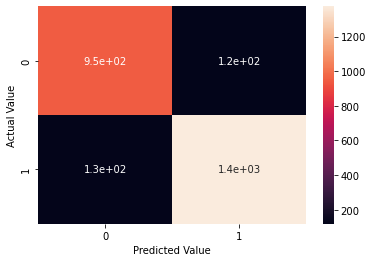

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [36]:
tp,fn,fp,tn=confusion_matrix(y1test,predic_y).reshape(-1)

In [37]:
tp

947

In [39]:
fn

119

In [40]:
fp

127

In [41]:
tn

1374

In [42]:
(tp+tn)/(tp+fn+fp+tn)

0.9041682898324893

In [43]:
knn.score(x1test,y1test)

0.9041682898324893

# ROC curve

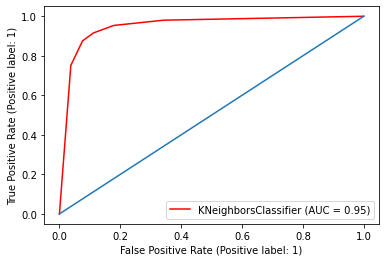

In [44]:
plot_roc_curve(knn,x1test,y1test,color='red')
plt.plot([0,1],[0,1])

# All type of pereformance with  confusion matrix

In [45]:
accuracy=(tp+tn)/(tp+fp+fn+tn)
accuracy

0.9041682898324893

In [46]:
ppv=tp/(tp+fp)
ppv

0.8817504655493482

In [47]:
tpr=tp/(tp+fn)

In [48]:
tpr

0.8883677298311444

In [49]:
fpr=fp/(fp+tn)

In [50]:
fpr

0.08461025982678215

In [51]:
f1_measure=(ppv+tpr)/2
f1_measure

0.8850590976902464

In [52]:
f1_score=(2*ppv+tpr)/(ppv+tpr)
f1_score

1.4981308411214953

In [53]:
specificity=tn/(tn+fp)
specificity

0.9153897401732178

In [55]:
csi=tp/(tp+fn+fp)
csi

0.7937971500419112

In [56]:
fdr=fp/(tp+fp)
fdr

0.11824953445065177